# Comparison between Forward and Backward tracing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects
import numpy as np
from itertools import cycle
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

Variable definitions:

1. Reproduction number: R
2. Overdispersion parameter: k
3. Relative reduction in infectiousness due to quarantine: c
4. Probability of identifying the primary (G0) case by backward tracing: b
5. Probability of identifying each offspring of an already identified case: q
6. Probability of a G1 case identified by surveillance independently of contact tracing: d




In [2]:
def tertiary_cases(R=1.2, # reproduction number
                            k=0.3, # dispersion
                            b=1, # probability cluster identified
                            q=0.5, # probability contact traced
                            c1=0.5, # proportional reduction from tracing index case
                            c2=0.5, # proportional reduction from tracing contact of cluster 
                            d=0.5 # probability detection of cases
                   ):
  
  #Averting G3 cases
  def tertiary_avert(R, k, b, q, c1, c2, d):
     return (R**2)*q*c1 + (1-(1-b*q)*(1-d))*q*c2*(R**3)*(1+1/k)

  # No tracing
  baseline_tertiary=tertiary_avert(R,k,1,1,1,1,1)
  
  # Cases averted with forward tracing
  forward_tertiary_avert=tertiary_avert(R,k,0,q,c1,c2,d)

  # Cases averted with forward + backward tracing
  forward_backward_tertiary_avert=tertiary_avert(R,k,b,q,c1,c2,d)

  tlist= {'base':baseline_tertiary,
    'forward_avert':forward_tertiary_avert,
    'fwd_back_avert':forward_backward_tertiary_avert,
    'backward_gain':forward_backward_tertiary_avert-forward_tertiary_avert}
    
  return tlist

### The effectiveness of forward + backward contact tracing over forward tracing

In [15]:
# Q and C are varied
def plotbypc (R=1.2, k=0.3, b=1, d = 0.5,fig_no=1, qs=np.array(robjects.reval("seq(0.0,1,0.1)")), cs=np.array(robjects.reval("seq(0.2,1,0.2)")), noplot=False, panel=np.zeros(3)):

    m = robjects.reval("matrix(seq(0.0,1,0.1),length(seq(0.0,1,0.1)),length(seq(0.2,1,0.2)))")
    qsmat = np.array(m)
    
    m1 = robjects.reval("matrix(seq(0.2,1,0.2),length(seq(0.0,1,0.1)),length(seq(0.2,1,0.2)),byrow=T)")
    csmat= np.array(m1)

    tertiary = tertiary_cases(R,k,b,qsmat,csmat,csmat,d)

    if(noplot):
      return(tertiary) # skip plotting
    
    m2 = robjects.reval("seq(0.0,1,0.1)")

    qs = np.array(m2)

    lines = ['--','-.',':',(0, (3, 5, 1, 5, 1, 5)),'-']
    linecycler = cycle(lines)

    # cycle= plt.cycler(linestyle=['--','-','-.',':','-'])

    figure, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18,5))
    figure.tight_layout()
     
    # Plotting the graphs

    for i in range(len(lines)):
      ax1.plot(qs,[row[i] for row in (tertiary['forward_avert']/tertiary['base'] )],ls=next(linecycler),marker='o')

    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Effectiveness(forward)',fontsize=10)
    ax1.set_xlabel('Proportion of contacts traced (q)',fontsize=10)
    ax1.legend(['c = 0', 'c = 0.2', 'c = 0.4','c = 0.6','c = 0.8','c = 1'], loc='upper left')
    ax1.set_title(str(fig_no))
    fig_no=fig_no+1


    for i in range(len(lines)):
      ax2.plot(qs,[row[i] for row in (tertiary['fwd_back_avert']/tertiary['base'])],ls=next(linecycler),marker='o')

    ax2.set_ylim(0, 1)
    ax2.set_ylabel('Effectiveness(forward+backward)',fontsize=10)
    ax2.set_xlabel('Proportion of contacts traced (q)',fontsize=10)
    ax2.legend(['c = 0', 'c = 0.2', 'c = 0.4','c = 0.6','c = 0.8','c = 1'], loc='upper left')
    ax2.set_title(str(fig_no))
    fig_no=fig_no+1

    for i in range(len(lines)):
      ax3.plot(qs,[row[i] for row in (tertiary['backward_gain']/tertiary['base'])],ls=next(linecycler),marker='o')
    
    ax3.set_ylim(0, 1)
    ax3.set_ylabel('Increment with backward tracing',fontsize=10)
    ax3.set_xlabel('Proportion of contacts traced (q)',fontsize=10)
    ax3.legend(['c = 0', 'c = 0.2', 'c = 0.4','c = 0.6','c = 0.8','c = 1'], loc='upper left')
    ax3.set_title(str(fig_no))

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
   
    figure.suptitle('R={}, k ={}, b={}, d={}'.format(R,k,b,d))
    plt.show()
   
    eff_array= tertiary['fwd_back_avert']/tertiary['forward_avert']
    eff_array[np.isnan(eff_array)] = 0
    
    return eff_array.mean(axis=0)


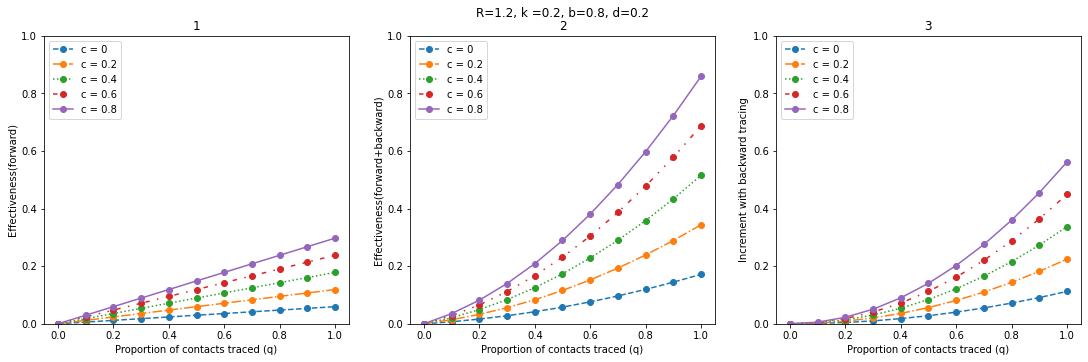



The factor by which backward tracing proves to be more effective than forward with different c values is:
 [1.8533532 1.8533532 1.8533532 1.8533532 1.8533532]





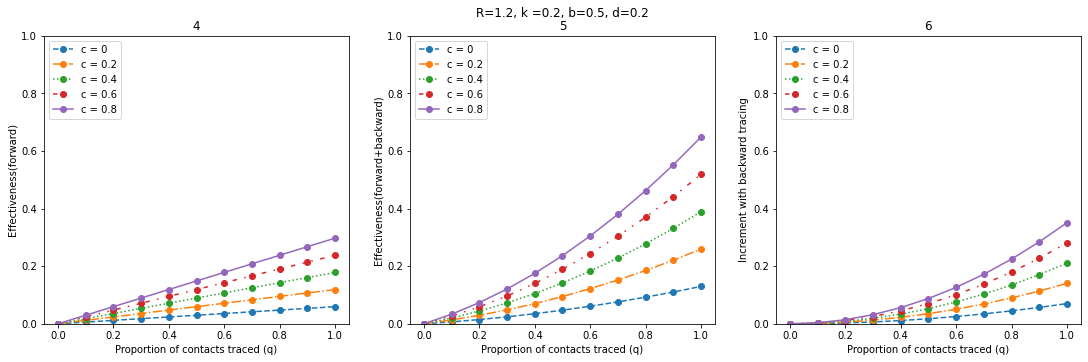



The factor by which backward tracing proves to be more effective than forward with different c values is:
 [1.49925484 1.49925484 1.49925484 1.49925484 1.49925484]





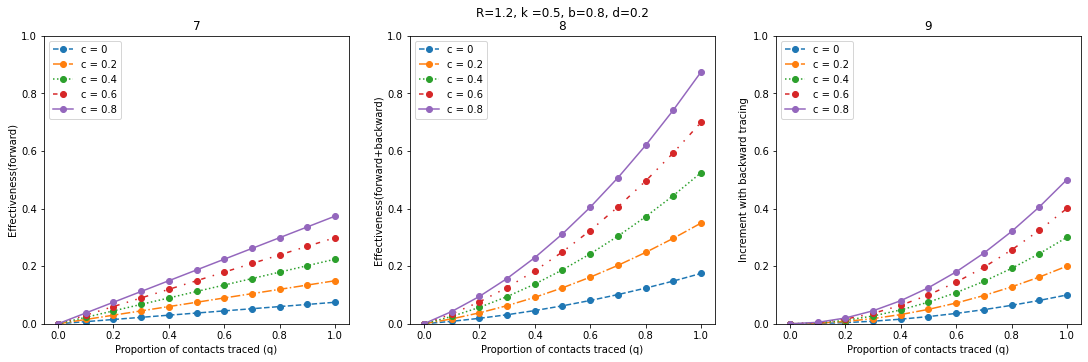



The factor by which backward tracing proves to be more effective than forward with different c values is:
 [1.57885835 1.57885835 1.57885835 1.57885835 1.57885835]


In [18]:
m=1
a1=plotbypc(R=1.2,k=0.2,b=0.8,d=0.2, fig_no=m)
print('\n')
print("The factor by which backward tracing proves to be more effective than forward with different c values is:\n", a1)
print("\n\n")
m=m+3
a2=plotbypc(R=1.2,k=0.2,b=0.5,d=0.2,fig_no=m)
print('\n')
print("The factor by which backward tracing proves to be more effective than forward with different c values is:\n", a2)
print("\n\n")
m=m+3
a3=plotbypc(R=1.2,k=0.5,b=0.8,d=0.2,fig_no=m)
print('\n')
print("The factor by which backward tracing proves to be more effective than forward with different c values is:\n", a3)



### The absolute number of cases averted by backward tracing

In [109]:
#R and k are varied
def plotbyRk (Rs=[1.2,1.5,2,2.5], ks=np.array(robjects.reval("seq(0.1,0.5,0.1)")), b=1, d = 0.5,fig_no=1, q=0.8, c=0.8, noplot=False, panel=np.zeros(3)):

    m_2 = robjects.reval("matrix(seq(0.1,0.5,0.1),length(seq(0.1,0.5,0.1)),length(c(1.2, 1.5, 2, 2.5)))")
    ksmat = np.array(m_2)
    
    m1_2 = robjects.reval("matrix(c(1.2, 1.5, 2, 2.5),length(seq(0.1,0.5,0.1)),length(c(1.2, 1.5, 2, 2.5)),byrow=T)")
    Rsmat= np.array(m1_2)

    tertiary = tertiary_cases(Rsmat,ksmat,b,q,c,c,d)
    
    if(noplot):
      return(tertiary) # skip plotting

    lines = ['--','-.',':','-']
    linecycler = cycle(lines)
   
    # Plotting the graphs
    figure, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18,5))
    figure.tight_layout()
     
    
    for i in range(len(lines)):
      ax1.plot(ks,[row[i] for row in (tertiary['forward_avert'])],ls=next(linecycler),marker='o')
    
    ax1.set_ylim(0, 100)
    ax1.set_ylabel('Cases averted (forward)',fontsize=10)
    ax1.set_xlabel('Overdispersion parameter (k)',fontsize=10)
    ax1.legend(['R = 1.2','R = 1.5','R = 2','R = 2.5'], loc='upper right')
    ax1.set_title(str(fig_no))
    fig_no=fig_no+1

    for i in range(len(lines)):
      ax2.plot(ks,[row[i] for row in (tertiary['fwd_back_avert'])],ls=next(linecycler),marker='o')

    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Cases averted (forward + backward)',fontsize=10)
    ax2.set_xlabel('Overdispersion parameter (k)',fontsize=10)
    ax2.legend(['R = 1.2','R = 1.5','R = 2','R = 2.5'], loc='upper right')
    ax2.set_title(str(fig_no))
    fig_no=fig_no+1


    for i in range(len(lines)):
      ax3.plot(ks,[row[i] for row in (tertiary['backward_gain'])],ls=next(linecycler),marker='o')

    ax3.set_ylim(0, 100)
    ax3.set_ylabel('Increment with backward tracing',fontsize=10)
    ax3.set_xlabel('Overdispersion parameter (k)',fontsize=10)
    ax3.legend(['R = 1.2','R = 1.5','R = 2','R = 2.5'], loc='upper right')
    ax3.set_title(str(fig_no))

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
   
    figure.suptitle('q={}, c ={}, b={}, d={}'.format(q,c,b,d))
    plt.show()
   

    return

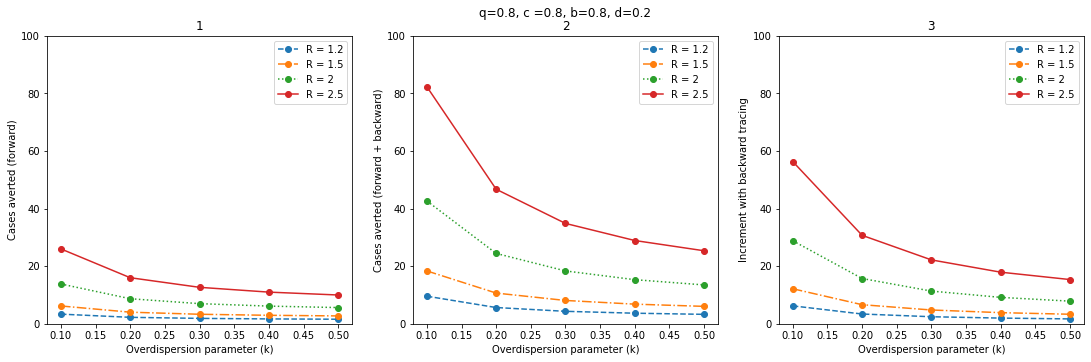

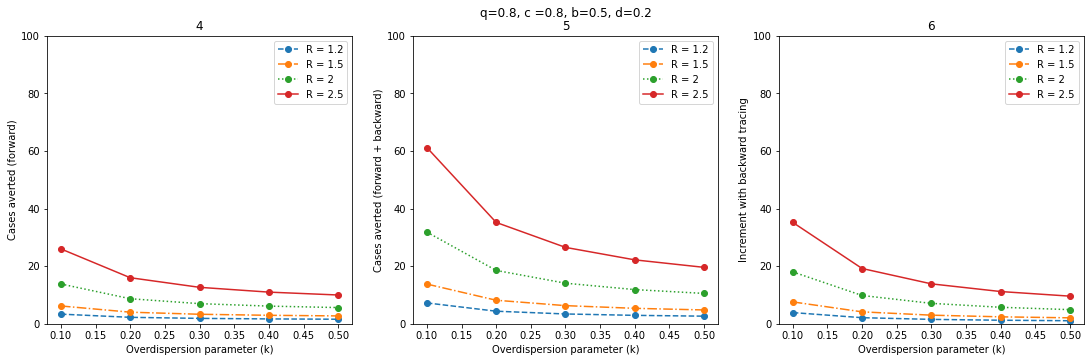

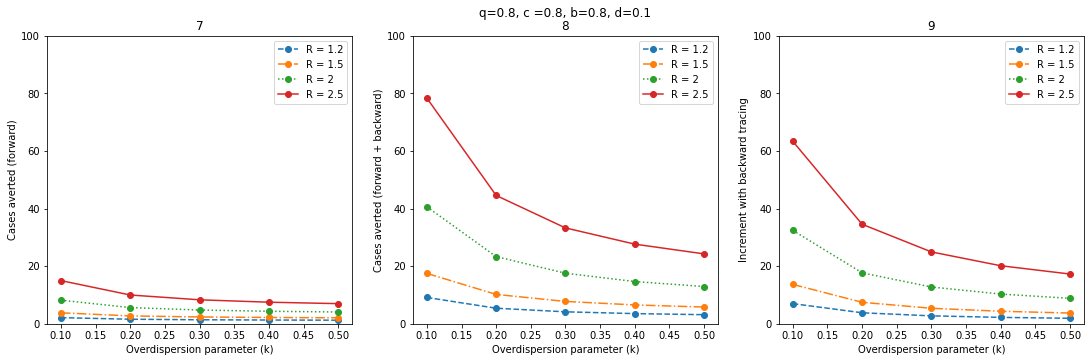

In [110]:
m=1
plotbyRk(q=0.8,c=0.8,b=0.8,d=0.2,fig_no=m)
print("\n")
m=m+3
plotbyRk(q=0.8,c=0.8,b=0.5,d=0.2,fig_no=m)
print("\n")
m=m+3
plotbyRk(q=0.8,c=0.8,b=0.8,d=0.1,fig_no=m)